In [2]:
from custom_benchmark_problems.diamon_problem.core.evaluation import BMP
from custom_benchmark_problems.diamon_problem.data_structures.tree import Tree
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42


dimension = 2
tree = Tree(dim_space=dimension)
tree.from_json("simplest_tree.json")
bmp = BMP(sequence_info=tree.to_sequence(), dim_space=dimension, rotate=False)

In [3]:
def f_3_l2(t, x_1, x_2):
    return -math.sqrt(x_1**2 + x_2**2)


def f_3_l1(t, x_1, x_2):
    return -(abs(x_1) + abs(x_2))

In [4]:
t_s = []
f_t_s = []
x_s = []
f_x_s = []
f_3_t_s = []
f_3_x_s = []
f_3_l1_t_s = []
f_3_l1_x_s = []
# for t in [x/100 for x in range(201)]:
#     t_s.append(t)
#     print(bmp.evaluate(np.array([t,0],dtype="float64")))
#     f_t_s.append(bmp.evaluate(np.array([t,0],dtype="float64")).y)
#     f_3_t_s.append(f_3_l2(t,0))
#     f_3_l1_t_s.append(f_3_l1(t,0))
for x_1 in [x / 100 for x in range(201)]:
    for x_2 in [x / 100 for x in range(201)]:
        x_s.append([x_1, x_2])
        f_x_s.append(bmp.evaluate(np.array([1, x_1, x_2], dtype="float64")).y)
        f_3_x_s.append(f_3_l2(1, x_1, x_2))
        f_3_l1_x_s.append(f_3_l1(1, x_1, x_2))

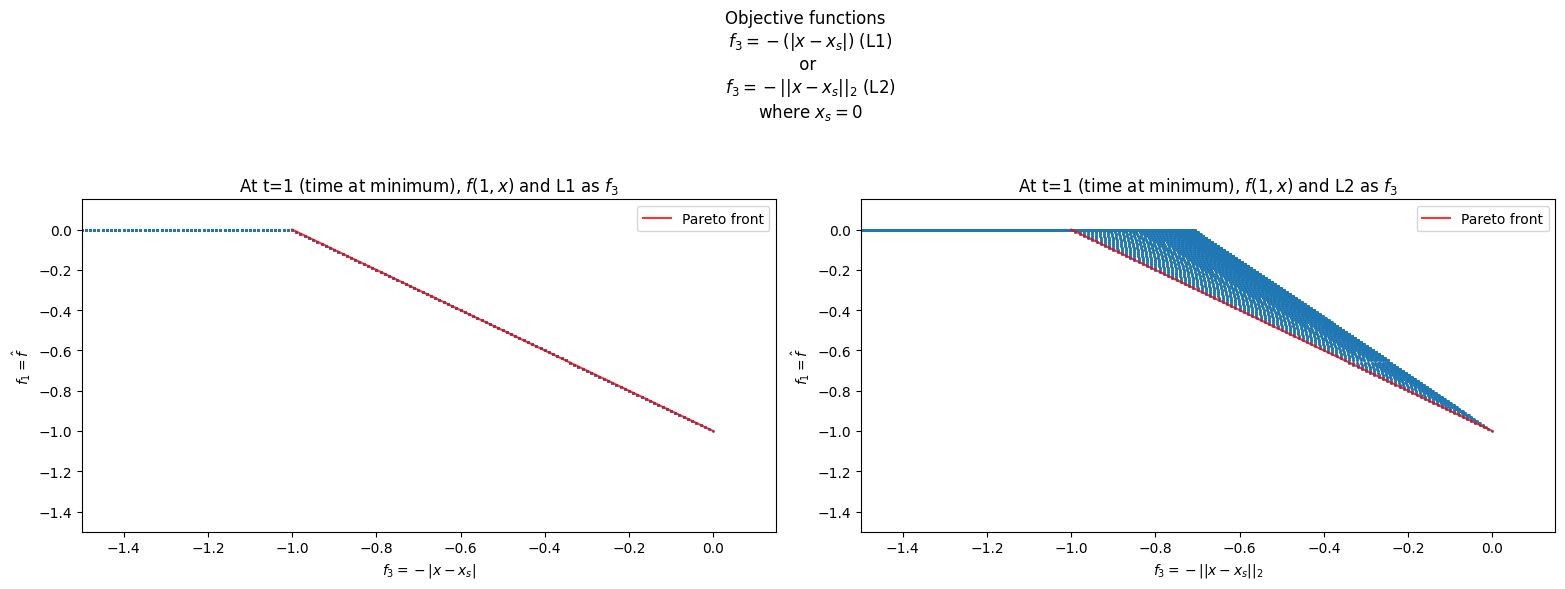

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(
    "Objective functions \n ${f_3=-(|x-x_s|)}$ (L1) \n or \n ${f_3=-||x-x_s||_2}$ (L2) \n where ${x_s=0}$"
)
fig.tight_layout(pad=3, h_pad=5)

indices = 101

x_s_mah = [f_3_l1(0, x[0], x[1]) for x in x_s]
x_s_square = [f_3_l2(0, x[0], x[1]) for x in x_s]


axs[0].set_title("At t=1 (time at minimum), ${f(1,x)}$ and L1 as ${f_3}$")
axs[0].set_xlabel("${f_3=-|x-x_s|}$")
axs[0].set_ylabel("${f_1=\hat{f}}$")
axs[0].scatter(x_s_mah, f_x_s, s=1)
axs[0].plot(
    x_s_mah[:indices], f_x_s[:indices], label="Pareto front", color="red", alpha=0.8
)
# axs[0].plot(x_s,f_3_l1_x_s, label="${f_3(t,0)}$")
axs[0].set_ylim([-1.5, 0.15])
axs[0].set_xlim([-1.5, 0.15])
axs[0].legend()

axs[1].set_title("At t=1 (time at minimum), ${f(1,x)}$ and L2 as ${f_3}$")
axs[1].set_xlabel("${f_3=-||x-x_s||_2}$")
axs[1].set_ylabel("${f_1=\hat{f}}$")
axs[1].scatter(x_s_square, f_x_s, s=1)
axs[1].plot(
    x_s_square[:indices], f_x_s[:indices], label="Pareto front", color="red", alpha=0.8
)
# axs[1].plot(x_s,f_3_x_s, label="${f_3(1,x)}$")
axs[1].set_ylim([-1.5, 0.15])
axs[1].set_xlim([-1.5, 0.15])
axs[1].legend()